In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pydotplus
from IPython.display import Image
import itertools

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC

## Import data

In [16]:
# display options:
pd.set_option('display.max_columns', None)

# import the data into a Pandas dataframe
data = pd.read_csv("hotel_bookings_ML_data.csv", index_col=0)
data.head(10)

is_canceled  lead_time  arrival_date_week_number  \
0          0.0   0.464043                       0.5   
1          0.0   1.000000                       0.5   
2          0.0   0.009498                       0.5   
3          0.0   0.017639                       0.5   
4          0.0   0.018996                       0.5   
5          0.0   0.018996                       0.5   
6          0.0   0.000000                       0.5   
7          0.0   0.012212                       0.5   
8          1.0   0.115332                       0.5   
9          1.0   0.101764                       0.5   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                        0.0                      0.0                  0.00   
1                        0.0                      0.0                  0.00   
2                        0.0                      0.0                  0.02   
3                        0.0                      0.0                  0.02   
4                        0.0                      0.0                  0.04   
5                        0.0                      0.0                  0.04   
6                        0.0                      0.0                  0.04   
7                        0.0                      0.0                  0.04   
8                        0.0                      0.0                  0.06   
9                        0.0                      0.0                  0.06   

     adults  children  babies  is_repeated_guest  previous_cancellations  \
0  0.036364       0.0     0.0                0.0                     0.0   
1  0.036364       0.0     0.0                0.0                     0.0   
2  0.018182       0.0     0.0                0.0                     0.0   
3  0.018182       0.0     0.0                0.0                     0.0   
4  0.036364       0.0     0.0                0.0                     0.0   
5  0.036364       0.0     0.0                0.0                     0.0   
6  0.036364       0.0     0.0                0.0                     0.0   
7  0.036364       0.0     0.0                0.0                     0.0   
8  0.036364       0.0     0.0                0.0                     0.0   
9  0.036364       0.0     0.0                0.0                     0.0   

   previous_bookings_not_canceled  agent  company  days_in_waiting_list  \
0                             0.0    0.0      0.0                   0.0   
1                             0.0    0.0      0.0                   0.0   
2                             0.0    0.0      0.0                   0.0   
3                             0.0    1.0      0.0                   0.0   
4                             0.0    1.0      0.0                   0.0   
5                             0.0    1.0      0.0                   0.0   
6                             0.0    0.0      0.0                   0.0   
7                             0.0    1.0      0.0                   0.0   
8                             0.0    1.0      0.0                   0.0   
9                             0.0    1.0      0.0                   0.0   

        adr  required_car_parking_spaces  total_of_special_requests  \
0  0.001180                          0.0                        0.0   
1  0.001180                          0.0                        0.0   
2  0.015053                          0.0                        0.0   
3  0.015053                          0.0                        0.0   
4  0.019307                          0.0                        0.2   
5  0.019307                          0.0                        0.2   
6  0.020972                          0.0                        0.0   
7  0.020232                          0.0                        0.2   
8  0.016347                          0.0                        0.2   
9  0.020694                          0.0                        0.0   

   is_canceled.1  hotel  arrival_date_month      meal  res_status_month  \
0      

Remove 'is_canceled.1' column:

In [17]:
data = data.drop('is_canceled.1',axis=1)

In [18]:
data.head(10)

is_canceled  lead_time  arrival_date_week_number  \
0          0.0   0.464043                       0.5   
1          0.0   1.000000                       0.5   
2          0.0   0.009498                       0.5   
3          0.0   0.017639                       0.5   
4          0.0   0.018996                       0.5   
5          0.0   0.018996                       0.5   
6          0.0   0.000000                       0.5   
7          0.0   0.012212                       0.5   
8          1.0   0.115332                       0.5   
9          1.0   0.101764                       0.5   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                        0.0                      0.0                  0.00   
1                        0.0                      0.0                  0.00   
2                        0.0                      0.0                  0.02   
3                        0.0                      0.0                  0.02   
4                        0.0                      0.0                  0.04   
5                        0.0                      0.0                  0.04   
6                        0.0                      0.0                  0.04   
7                        0.0                      0.0                  0.04   
8                        0.0                      0.0                  0.06   
9                        0.0                      0.0                  0.06   

     adults  children  babies  is_repeated_guest  previous_cancellations  \
0  0.036364       0.0     0.0                0.0                     0.0   
1  0.036364       0.0     0.0                0.0                     0.0   
2  0.018182       0.0     0.0                0.0                     0.0   
3  0.018182       0.0     0.0                0.0                     0.0   
4  0.036364       0.0     0.0                0.0                     0.0   
5  0.036364       0.0     0.0                0.0                     0.0   
6  0.036364       0.0     0.0                0.0                     0.0   
7  0.036364       0.0     0.0                0.0                     0.0   
8  0.036364       0.0     0.0                0.0                     0.0   
9  0.036364       0.0     0.0                0.0                     0.0   

   previous_bookings_not_canceled  agent  company  days_in_waiting_list  \
0                             0.0    0.0      0.0                   0.0   
1                             0.0    0.0      0.0                   0.0   
2                             0.0    0.0      0.0                   0.0   
3                             0.0    1.0      0.0                   0.0   
4                             0.0    1.0      0.0                   0.0   
5                             0.0    1.0      0.0                   0.0   
6                             0.0    0.0      0.0                   0.0   
7                             0.0    1.0      0.0                   0.0   
8                             0.0    1.0      0.0                   0.0   
9                             0.0    1.0      0.0                   0.0   

        adr  required_car_parking_spaces  total_of_special_requests  hotel  \
0  0.001180                          0.0                        0.0    0.0   
1  0.001180                          0.0                        0.0    0.0   
2  0.015053                          0.0                        0.0    0.0   
3  0.015053                          0.0                        0.0    0.0   
4  0.019307                          0.0                        0.2    0.0   
5  0.019307                          0.0                        0.2    0.0   
6  0.020972                          0.0                        0.0    0.0   
7  0.020232                          0.0                        0.2    0.0   
8  0.016347                          0.0                        0.2    0.0   
9  0.020694                          0.0                        0.0    0.0   

   ar

## Data split

In [19]:
X,y = data.drop('is_canceled', 1), data['is_canceled']
print(X.shape)
X.head(10)

(119205, 49)


/tmp/ipykernel_137/771570734.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X,y = data.drop('is_canceled', 1), data['is_canceled']


lead_time  arrival_date_week_number  arrival_date_day_of_month  \
0   0.464043                       0.5                        0.0   
1   1.000000                       0.5                        0.0   
2   0.009498                       0.5                        0.0   
3   0.017639                       0.5                        0.0   
4   0.018996                       0.5                        0.0   
5   0.018996                       0.5                        0.0   
6   0.000000                       0.5                        0.0   
7   0.012212                       0.5                        0.0   
8   0.115332                       0.5                        0.0   
9   0.101764                       0.5                        0.0   

   stays_in_weekend_nights  stays_in_week_nights    adults  children  babies  \
0                      0.0                  0.00  0.036364       0.0     0.0   
1                      0.0                  0.00  0.036364       0.0     0.0   
2                      0.0                  0.02  0.018182       0.0     0.0   
3                      0.0                  0.02  0.018182       0.0     0.0   
4                      0.0                  0.04  0.036364       0.0     0.0   
5                      0.0                  0.04  0.036364       0.0     0.0   
6                      0.0                  0.04  0.036364       0.0     0.0   
7                      0.0                  0.04  0.036364       0.0     0.0   
8                      0.0                  0.06  0.036364       0.0     0.0   
9                      0.0                  0.06  0.036364       0.0     0.0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                0.0                     0.0                             0.0   
1                0.0                     0.0                             0.0   
2                0.0                     0.0                             0.0   
3                0.0                     0.0                             0.0   
4                0.0                     0.0                             0.0   
5                0.0                     0.0                             0.0   
6                0.0                     0.0                             0.0   
7                0.0                     0.0                             0.0   
8                0.0                     0.0                             0.0   
9                0.0                     0.0                             0.0   

   agent  company  days_in_waiting_list       adr  \
0    0.0      0.0                   0.0  0.001180   
1    0.0      0.0                   0.0  0.001180   
2    0.0      0.0                   0.0  0.015053   
3    1.0      0.0                   0.0  0.015053   
4    1.0      0.0                   0.0  0.019307   
5    1.0      0.0                   0.0  0.019307   
6    0.0      0.0                   0.0  0.020972   
7    1.0      0.0                   0.0  0.020232   
8    1.0      0.0                   0.0  0.016347   
9    1.0      0.0                   0.0  0.020694   

   required_car_parking_spaces  total_of_special_requests  hotel  \
0                          0.0                        0.0    0.0   
1                          0.0                        0.0    0.0   
2                          0.0                        0.0    0.0   
3                          0.0                        0.0    0.0   
4                          0.0                        0.2    0.0   
5                          0.0                        0.2    0.0   
6                          0.0                        0.0    0.0   
7                          0.0                        0.2    0.0   
8                          0.0                        0.2    0.0   
9                          0.0                        0.0    0.0   

   arrival_date_month      meal  res_status_month  res_status_day  \
0            0.545455  0.666667          0.545455        0.000000   
1         

In [20]:
# dividing the dataset into training (X_train, y_train), validation (X_val, y_val) and testing (X_test,y_test) data

Xt, X_test, yt, y_test = train_test_split(X,y,test_size=0.1,train_size=0.9, random_state = 1234)
X_train, X_val, y_train, y_val = train_test_split(Xt,yt,test_size = 0.89,train_size =0.11, random_state = 5678)

print('Size of X_train: {} ({:2.2f}%)'.format(X_train.shape[0], 100*round(X_train.shape[0]/X.shape[0],3)))
print('Size of X_val: {} ({:2.2f}%)'.format(X_val.shape[0], 100*round(X_val.shape[0]/X.shape[0],3)))
print('Size of X_test: {} ({:2.2f}%)'.format(X_test.shape[0], 100*round(X_test.shape[0]/X.shape[0],3)))

Size of X_train: 11801 (9.90%)
Size of X_val: 95483 (80.10%)
Size of X_test: 11921 (10.00%)


## Decision tree

### First display all correlations:

In [21]:
data.corr().sort_values(by='is_canceled', ascending=False)

is_canceled  lead_time  \
is_canceled                        1.000000   0.292930   
dep_type_Non Refund                0.481537   0.380115   
lead_time                          0.292930   1.000000   
mar_seg_Groups                     0.222014   0.346411   
dist_ch_TA/TO                      0.176107   0.221502   
hotel                              0.137049   0.075994   
cust_type_Transient                0.133325  -0.174096   
previous_cancellations             0.110147   0.086023   
agent                              0.102259   0.179546   
res_room_A                         0.069197   0.104071   
adults                             0.058157   0.117601   
days_in_waiting_list               0.054308   0.170007   
adr                                0.046559  -0.065068   
stays_in_week_nights               0.025551   0.166892   
arrival_date_month                 0.011160   0.131620   
arrival_date_week_number           0.008299   0.127060   
res_room_H                         0.005439  -0.017134   
children                           0.004877  -0.037887   
res_room_L                        -0.000550  -0.006911   
stays_in_weekend_nights           -0.001309   0.085981   
res_room_G                        -0.001667  -0.029749   
meal                              -0.003502  -0.151553   
arrival_date_day_of_month         -0.005910   0.002272   
mar_seg_Online TA                 -0.006219  -0.186629   
res_room_C                        -0.007333  -0.019801   
res_room_B                        -0.008839   0.008904   
dep_type_Refundable               -0.011344   0.016563   
mar_seg_Aviation                  -0.013754  -0.041435   
dist_ch_GDS                       -0.014927  -0.031424   
res_room_F                        -0.021773  -0.052413   
cust_type_Contract                -0.023683   0.068622   
mar_seg_Offline TA/TO             -0.028654   0.146251   
babies                            -0.032567  -0.021006   
res_status_day                    -0.033997  -0.007715   
cust_type_Group                   -0.038841  -0.031762   
res_room_E                        -0.038874  -0.029338   
mar_seg_Complementary             -0.040329  -0.066421   
res_room_D                        -0.047722  -0.070530   
previous_bookings_not_canceled    -0.057364  -0.073603   
res_status_month                  -0.068573   0.056119   
dist_ch_Corporate                 -0.075583  -0.134410   
mar_seg_Corporate                 -0.081639  -0.165152   
is_repeated_guest                 -0.083741  -0.123217   
company                           -0.099686  -0.125961   
cust_type_Transient-Party         -0.124370   0.159612   
dist_ch_Direct                    -0.151574  -0.161557   
mar_seg_Direct                    -0.154384  -0.174241   
required_car_parking_spaces       -0.195684  -0.116640   
total_of_special_requests         -0.234917  -0.095925   
dep_type_No Deposit               -0.477988  -0.380168   

                                arrival_date_week_number  \
is_canceled                                     0.008299   
dep_type_Non Refund                             0.007836   
lead_time                                       0.127060   
mar_seg_Groups                                  0.002946   
dist_ch_TA/TO                                   0.009399   
hotel                                           0.001233   
cust_type_Transient                            -0.079490   
previous_cancellations                          0.035494   
agent                                           0.032256   
res_room_A                                      0.008510   
adults                                          0.026559   
days_in_waiting_list                            0.022679   
adr                                             0.076302   
stays_in_week_nights                            0.016048   
arrival_date_month                              0.995102   
arrival_date_week_number                        1.000000   
res_room_H                                      0.005

### Form a decision tree classifier (clf1) that has a small amount of nodes for interpretability:

Fontconfig error: Cannot load default config file



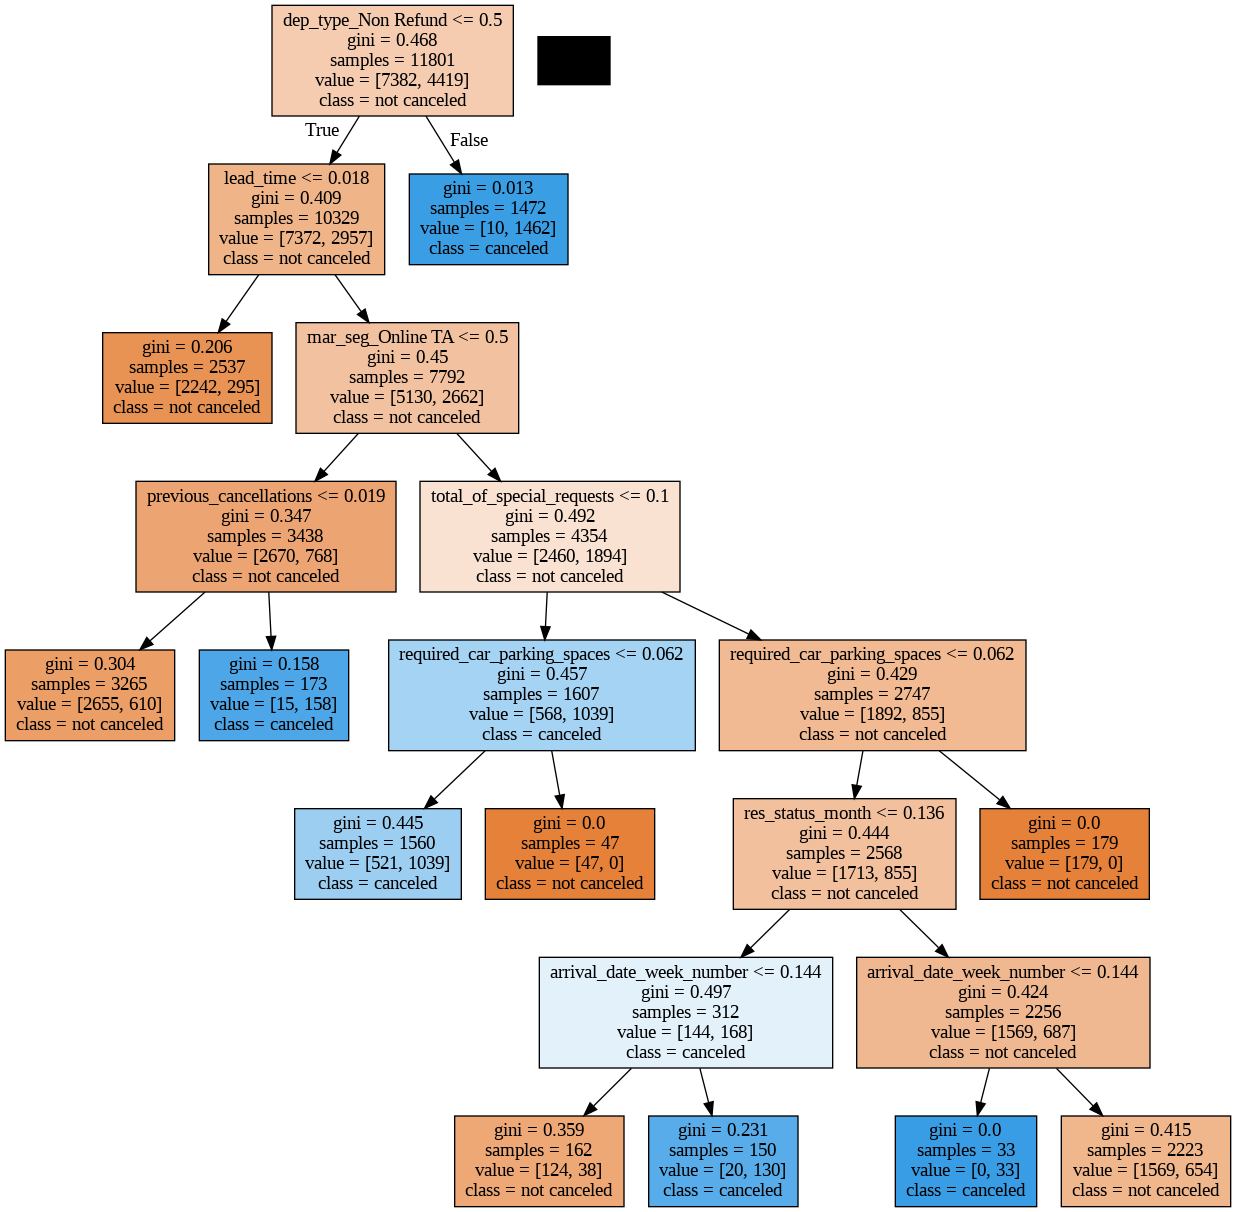

In [22]:
clf1 = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100, 
                                min_samples_leaf = 20, min_impurity_decrease = 0.0025)

clf1.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf1, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=['not canceled', 'canceled'], filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

In [23]:
y_pred1 = clf1.predict(X_val)
y_pred_prob_clf1 = clf1.predict_proba(X_val)

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Form a decision tree classifier (clf1) that has a small amount of nodes for interpretability:

This following decision tree is mainly exploratory. Is this what overfitting means?

In [25]:
clf2 = tree.DecisionTreeClassifier(random_state = 100)

clf2.fit(X_train, y_train)

dot_data = tree.export_graphviz(clf2, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=['not canceled', 'canceled'], filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

Fontconfig error: Cannot load default config file
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.534771 to fit



In [26]:
y_pred2 = clf2.predict(X_val)
y_pred_prob_clf2 = clf2.predict_proba(X_val)

In [27]:
lr = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
y_pred_prob_lr = lr.predict_proba(X_val)

In [28]:
svm = SVC(probability = True).fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)
y_pred_prob_svm = svm.predict_proba(X_val)

### Print accuracies of all models:

In [29]:
print ("Accuracy of clf1 is: ", (accuracy_score(y_val,y_pred1)*100).round(3))
print ("Accuracy of clf2 is: ", (accuracy_score(y_val,y_pred2)*100).round(3))
print("Accuracy of logistic regression is: ", (accuracy_score(y_val, y_pred_lr)*100).round(3))
print("Accuracy of SVM is: ", (accuracy_score(y_val, y_pred_svm)*100).round(3))
#print("CLF1 Score is: ", clf1.score(X_val, y_val).round(3))
#print("CLF2 Score is: ", clf2.score(X_val, y_val).round(3))
#print("Logistic regression Score is: ", lr.score(X_val, y_val).round(3))
#print("SVM Score is: ", svm.score(X_val, y_val).round(3))

Accuracy of clf1 is:  81.607
Accuracy of clf2 is:  90.72
Accuracy for logistic regression is:  80.451
Accuracy for SVM is:  81.624
CLF1 Score is:  0.816
CLF2 Score is:  0.907
Logistic regression Score is:  0.805
SVM Score is:  0.816


### Show confusion matrices for all models:

[[55641  4537]
 [ 4324 30981]]
[[0.92 0.08]
 [0.12 0.88]]
[[55641  4537]
 [ 4324 30981]]
[[0.92 0.08]
 [0.12 0.88]]
[[56896  3282]
 [15384 19921]]
[[0.95 0.05]
 [0.44 0.56]]
[[59578   600]
 [16946 18359]]
[[0.99 0.01]
 [0.48 0.52]]


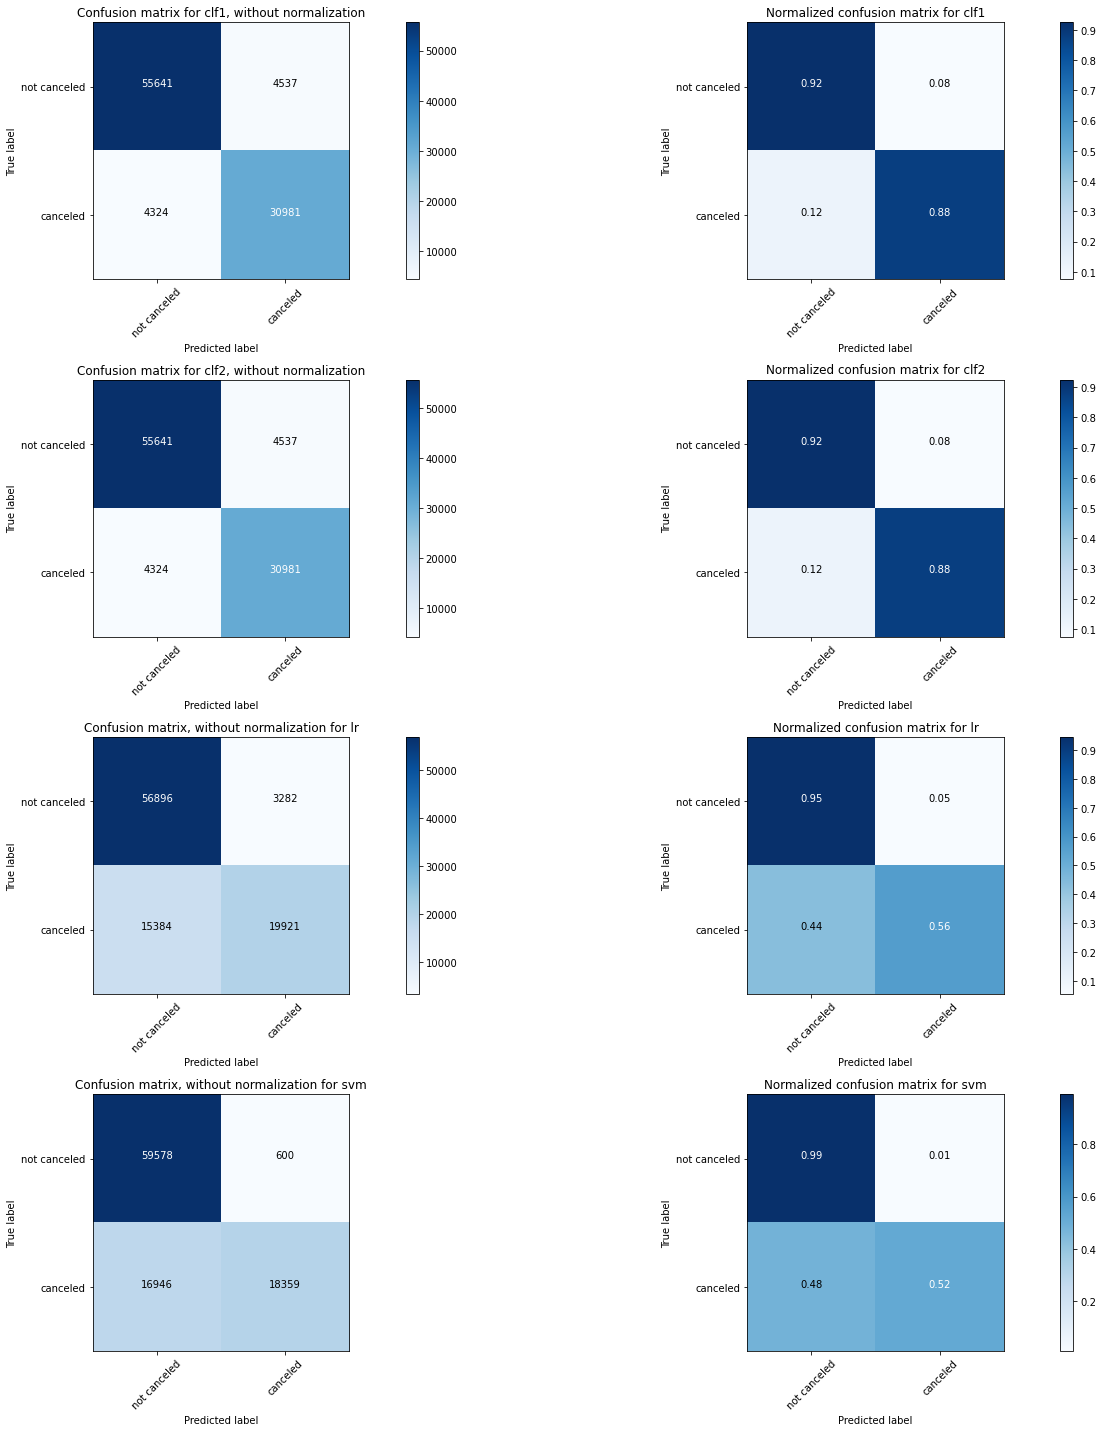

In [32]:
# Compute confusion matrix
class_names = ['not canceled', 'canceled']
cnf_matrix_lr = confusion_matrix(y_val, y_pred_lr)
cnf_matrix_svm = confusion_matrix(y_val, y_pred_svm)
cnf_matrix = confusion_matrix(y_val, y_pred1)
cnf_matrix = confusion_matrix(y_val, y_pred2)
np.set_printoptions(precision=2)

plt.figure(figsize=(25, 20))

# Plot non-normalized confusion matrix for clf1
plt.subplot(421) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for clf1, without normalization')

# Plot normalized confusion matrix for clf1
plt.subplot(422) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for clf1')

# Plot non-normalized confusion matrix for clf2
plt.subplot(423) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for clf2, without normalization')

# Plot normalized confusion matrix for clf2
plt.subplot(424) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for clf2')

# Plot non-normalized confusion matrix for lr
plt.subplot(425) 
plot_confusion_matrix(cnf_matrix_lr, classes=class_names,
                      title='Confusion matrix, without normalization for lr')

# Plot normalized confusion matrix for lr
plt.subplot(426) 
plot_confusion_matrix(cnf_matrix_lr, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for lr')

# Plot non-normalized confusion matrix for svm
plt.subplot(427) 
plot_confusion_matrix(cnf_matrix_svm, classes=class_names,
                      title='Confusion matrix, without normalization for svm')

# Plot normalized confusion matrix for svm
plt.subplot(428) 
plot_confusion_matrix(cnf_matrix_svm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix for svm')

plt.show()

### Show ROC curves ond AUC scores for all models:

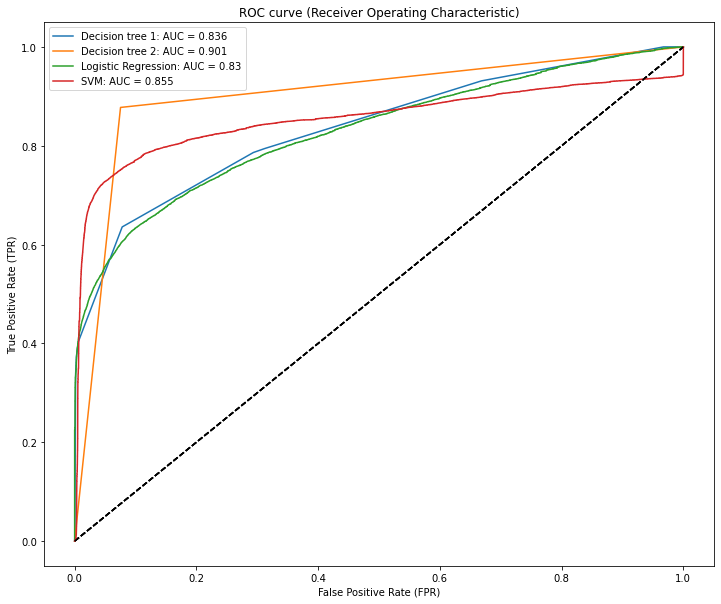

In [31]:
plt.figure(figsize=(12,10))

for val, pred, name in zip([y_val, y_val, y_val, y_val], [y_pred_prob_clf1[:,1], y_pred_prob_clf2[:,1], y_pred_prob_lr[:,1], y_pred_prob_svm[:,1]], ['Decision tree 1', 'Decision tree 2', 'Logistic Regression','SVM']):
    fpr, tpr, _ = roc_curve(val, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()